In [1]:
import json

In [2]:
with open('clean_corpus') as file:
  corpus = json.load(file)
  

In [3]:
for i in range(len(corpus)):
    corpus[i]['text'] = corpus[i]['text'].split()

In [4]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luigi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words("russian")


In [6]:
keywords = []
for i in range(len(corpus)):
    for j in range(len(corpus[i]['POS'])):
        if corpus[i]['POS'][j] == 'NOUN':
            keywords.append((corpus[i]['text'][j], 'text' + str(i)))
            

In [7]:
clean_keywords = []
for i in range(len(keywords)):
    if keywords[i][0] not in stopwords_list:
        clean_keywords.append(keywords[i])
    

In [8]:
import pymorphy2
analyzer = pymorphy2.MorphAnalyzer()

In [9]:
keywords = []
for i in range(len(clean_keywords)):
    parsed_word = analyzer.parse(clean_keywords[i][0])[0]
    if parsed_word.tag.POS == 'NOUN':
        keywords.append((parsed_word.normal_form, clean_keywords[i][1]))

In [10]:
keywords[0:50]


[('внешность', 'text0'),
 ('принадлежность', 'text0'),
 ('иисус', 'text0'),
 ('христос', 'text0'),
 ('существование', 'text0'),
 ('христианство', 'text0'),
 ('завет', 'text0'),
 ('век', 'text0'),
 ('принадлежность', 'text0'),
 ('дебаты', 'text0'),
 ('век', 'text0'),
 ('ряд', 'text0'),
 ('документ', 'text0'),
 ('человек', 'text0'),
 ('представление', 'text0'),
 ('изображение', 'text0'),
 ('борода', 'text0'),
 ('исследование', 'text0'),
 ('основа', 'text0'),
 ('источник', 'text0'),
 ('век', 'text0'),
 ('мнение', 'text0'),
 ('тенденция', 'text0'),
 ('гибель', 'text1'),
 ('ребёнок', 'text1'),
 ('красноярск', 'text1'),
 ('смерть', 'text1'),
 ('группа', 'text1'),
 ('школьник', 'text1'),
 ('красноярск', 'text1'),
 ('год', 'text1'),
 ('мальчик', 'text1'),
 ('возраст', 'text1'),
 ('апрель', 'text1'),
 ('май', 'text1'),
 ('коллектор', 'text1'),
 ('дело', 'text1'),
 ('убийство', 'text1'),
 ('орган', 'text1'),
 ('срок', 'text1'),
 ('расследование', 'text1'),
 ('год', 'text1'),
 ('день', 'text1'),


In [11]:
from nltk.probability import FreqDist


In [12]:
fdist = FreqDist()
for pair in keywords:
    fdist[pair[0]] += 1
common_kw = fdist.most_common(50)
print(common_kw)

[('год', 189), ('человек', 43), ('существо', 37), ('время', 33), ('дело', 30), ('убийство', 26), ('смерть', 25), ('имя', 24), ('исчезновение', 23), ('расследование', 22), ('ребёнок', 20), ('июль', 20), ('животное', 20), ('январь', 20), ('сша', 19), ('группа', 18), ('август', 18), ('век', 16), ('название', 16), ('тело', 16), ('псевдоним', 16), ('март', 16), ('октябрь', 16), ('июнь', 15), ('личность', 14), ('город', 14), ('апрель', 13), ('обстоятельство', 13), ('автор', 13), ('декабрь', 13), ('история', 13), ('мальчик', 12), ('фотография', 12), ('девочка', 12), ('родитель', 12), ('происшествие', 11), ('инцидент', 11), ('происхождение', 11), ('причина', 11), ('событие', 11), ('февраль', 11), ('зверь', 11), ('часть', 11), ('ноябрь', 11), ('ряд', 10), ('май', 10), ('день', 10), ('сообщение', 10), ('конец', 10), ('версия', 10)]


In [13]:
kw = []
clean_keywords = []
for key in common_kw:
    kw.append(key[0])
for i in range(len(keywords)):
    if keywords[i][0] in kw:
        clean_keywords.append(keywords[i])
        

In [16]:
print(len(clean_keywords))
keywords = clean_keywords

535


In [15]:
clean_keywords = []
to_remove = ["год", "имя", "июль", "январь", "группа", "август", "век", "название", "псевдоним", "март", "октябрь", "июнь", \
             "апрель", "декабрь", "февраль", "часть", "ноябрь", "ряд", "май"]
for key in keywords:
    if key[0] not in to_remove:
      clean_keywords.append(key)  

In [17]:
import sqlite3

In [18]:
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE keywords (word, text_id);")

con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE keywords (word, text_id);")
cur.executemany("INSERT INTO keywords (word, text_id) "
                "VALUES (?, ?);",
                keywords)
con.commit()
sql1 = "SELECT word, " \
       "COUNT(word) AS cnt " \
       "FROM keywords " \
       "GROUP BY word " \
       "ORDER BY cnt " \
       "DESC;"
cur.execute(sql1)
to_print = cur.fetchall()
uniq_words = []
pairs = []
for row in to_print:
    uniq_words.append(row[0])

print("All keywords:", len(keywords))
print("Unique keywords:", len(uniq_words))


All keywords: 535
Unique keywords: 31


In [19]:
sql2 = "SELECT a.word a, b.word b, " \
       "COUNT(*) cnt " \
       "FROM keywords a " \
       "JOIN keywords b " \
       "ON b.text_id = a.text_id AND b.word > a.word " \
       "GROUP BY a.word, b.word " \
       "ORDER BY cnt " \
       "DESC;"
cur.execute(sql2)
occ = cur.fetchall()


weighted_pairs = []

for row in occ:
    weighted_pairs.append((row[0], row[1], row[2]))

for i in range(0,15):
  print(i, weighted_pairs[i])

0 ('дело', 'смерть', 21)
1 ('сообщение', 'существо', 19)
2 ('животное', 'существо', 18)
3 ('дело', 'убийство', 17)
4 ('история', 'ребёнок', 16)
5 ('ребёнок', 'убийство', 16)
6 ('время', 'существо', 13)
7 ('дело', 'расследование', 13)
8 ('дело', 'ребёнок', 13)
9 ('дело', 'тело', 13)
10 ('исчезновение', 'мальчик', 13)
11 ('мальчик', 'происшествие', 13)
12 ('фотография', 'человек', 13)
13 ('зверь', 'существо', 12)
14 ('ребёнок', 'родитель', 12)


In [20]:
for w_pair in weighted_pairs:
    if w_pair[2] < 2:
        weighted_pairs.remove(w_pair)

In [21]:
import networkx as nx


In [22]:
G = nx.Graph()
G.add_weighted_edges_from(weighted_pairs)

In [23]:
print(nx.info(G))
density = nx.density(G)
print("Network density:", density)
if nx.is_connected(G):
    print("Connectivity: True")
    print("Network diameter: ", nx.diameter(G))
else:
    print("Connectivity: False")

Name: 
Type: Graph
Number of nodes: 31
Number of edges: 252
Average degree:  16.2581
Network density: 0.5419354838709678
Connectivity: True
Network diameter:  3


In [24]:
node_sizes = [deg*10 for node, deg in list(G.degree)]
print(list(G.degree))
print(node_sizes)

[('дело', 23), ('смерть', 20), ('сообщение', 14), ('существо', 12), ('животное', 14), ('убийство', 19), ('история', 21), ('ребёнок', 22), ('время', 23), ('расследование', 23), ('тело', 17), ('исчезновение', 18), ('мальчик', 10), ('происшествие', 16), ('фотография', 5), ('человек', 21), ('зверь', 12), ('родитель', 14), ('обстоятельство', 11), ('девочка', 17), ('инцидент', 13), ('сша', 18), ('личность', 14), ('причина', 20), ('день', 15), ('событие', 19), ('конец', 18), ('город', 21), ('происхождение', 16), ('версия', 14), ('автор', 4)]
[230, 200, 140, 120, 140, 190, 210, 220, 230, 230, 170, 180, 100, 160, 50, 210, 120, 140, 110, 170, 130, 180, 140, 200, 150, 190, 180, 210, 160, 140, 40]


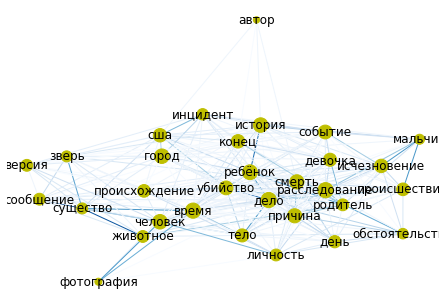

In [25]:
import matplotlib.pyplot as plt

pos = nx.layout.spring_layout(G)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, node_color='y', node_size=node_sizes, edgelist=edges, edge_color=weights, width=1.0, with_labels=True, edge_cmap=plt.cm.Blues)
plt.show()

In [26]:
nx.write_gexf(G, 'cryptids.gexf')